In [1]:
from quote_prediction.data import ExplicitQuoteCorpus, Novel
import numpy as np 
import tqdm 
import torch
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from collections import defaultdict
from nltk import word_tokenize
import re 
import spacy
from main import * 
from collections import Counter, defaultdict
from utils import *

In [2]:
corpus = ExplicitQuoteCorpus("/data/datasets/project-dialogism-novel-corpus/data/")

In [18]:
pairs = corpus.chapterwise_AV_samples(
            min_utterances_for_anchor=5
        )
iterator = [(pairs, "chapterwise")]


NOVEL: AHandfulOfDust, ID 0 - # of queries: 25 - avg # of targets: 16.0 - avg # of quote targets: 1388.0 - avg query length: 61.8 - # of speakers in novel 17 - Percent Active Speakers 0.588
NOVEL: APassageToIndia, ID 1 - # of queries: 88 - avg # of targets: 18.0 - avg # of quote targets: 1904.2 - avg query length: 21.5 - # of speakers in novel 18 - Percent Active Speakers 1.000
NOVEL: ARoomWithAView, ID 2 - # of queries: 67 - avg # of targets: 10.0 - avg # of quote targets: 1474.4 - avg query length: 22.5 - # of speakers in novel 10 - Percent Active Speakers 1.000
NOVEL: AlicesAdventuresInWonderland, ID 3 - # of queries: 29 - avg # of targets: 11.0 - avg # of quote targets: 541.5 - avg query length: 19.0 - # of speakers in novel 11 - Percent Active Speakers 0.909
NOVEL: AnneOfGreenGables, ID 4 - # of queries: 75 - avg # of targets: 5.0 - avg # of quote targets: 1064.4 - avg query length: 13.1 - # of speakers in novel 5 - Percent Active Speakers 1.000
NOVEL: DaisyMiller, ID 5 - # of que

In [21]:
model, tokenizer = get_model("semantics")
model = model.to(torch.device("cuda:0"))

2024-01-25 14:38:43,362 - Load pretrained SentenceTransformer: sentence-transformers/all-mpnet-base-v2
2024-01-25 14:38:44,392 - Use pytorch device: cuda


In [27]:
quote_embeddings = process_quotes(
                corpus["quotes"], "semantics", model, tokenizer
            )

  0%|          | 0/28 [00:00<?, ?it/s]

Batches:   0%|          | 0/59 [00:00<?, ?it/s]

  4%|▎         | 1/28 [00:01<00:51,  1.92s/it]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

  7%|▋         | 2/28 [00:03<00:38,  1.48s/it]

Batches:   0%|          | 0/49 [00:00<?, ?it/s]

 11%|█         | 3/28 [00:04<00:30,  1.22s/it]

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

 14%|█▍        | 4/28 [00:04<00:21,  1.14it/s]

Batches:   0%|          | 0/35 [00:00<?, ?it/s]

 18%|█▊        | 5/28 [00:05<00:20,  1.12it/s]

Batches:   0%|          | 0/17 [00:00<?, ?it/s]

 21%|██▏       | 6/28 [00:05<00:15,  1.44it/s]

Batches:   0%|          | 0/50 [00:00<?, ?it/s]

 25%|██▌       | 7/28 [00:06<00:18,  1.11it/s]

Batches:   0%|          | 0/49 [00:00<?, ?it/s]

 29%|██▊       | 8/28 [00:08<00:19,  1.02it/s]

Batches:   0%|          | 0/77 [00:00<?, ?it/s]

 32%|███▏      | 9/28 [00:09<00:21,  1.11s/it]

Batches:   0%|          | 0/34 [00:00<?, ?it/s]

 36%|███▌      | 10/28 [00:10<00:18,  1.04s/it]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

 39%|███▉      | 11/28 [00:11<00:18,  1.07s/it]

Batches:   0%|          | 0/24 [00:00<?, ?it/s]

 43%|████▎     | 12/28 [00:12<00:14,  1.09it/s]

Batches:   0%|          | 0/73 [00:00<?, ?it/s]

 46%|████▋     | 13/28 [00:13<00:16,  1.09s/it]

Batches:   0%|          | 0/13 [00:00<?, ?it/s]

 50%|█████     | 14/28 [00:13<00:12,  1.15it/s]

Batches:   0%|          | 0/38 [00:00<?, ?it/s]

 54%|█████▎    | 15/28 [00:14<00:11,  1.11it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

 57%|█████▋    | 16/28 [00:15<00:10,  1.15it/s]

Batches:   0%|          | 0/40 [00:00<?, ?it/s]

 61%|██████    | 17/28 [00:16<00:09,  1.17it/s]

Batches:   0%|          | 0/18 [00:00<?, ?it/s]

 64%|██████▍   | 18/28 [00:16<00:06,  1.43it/s]

Batches:   0%|          | 0/23 [00:00<?, ?it/s]

 68%|██████▊   | 19/28 [00:17<00:05,  1.53it/s]

Batches:   0%|          | 0/26 [00:00<?, ?it/s]

 71%|███████▏  | 20/28 [00:17<00:04,  1.63it/s]

Batches:   0%|          | 0/23 [00:00<?, ?it/s]

 75%|███████▌  | 21/28 [00:18<00:04,  1.73it/s]

Batches:   0%|          | 0/55 [00:00<?, ?it/s]

 79%|███████▊  | 22/28 [00:19<00:04,  1.38it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

 82%|████████▏ | 23/28 [00:20<00:03,  1.38it/s]

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

 86%|████████▌ | 24/28 [00:20<00:02,  1.54it/s]

Batches:   0%|          | 0/17 [00:00<?, ?it/s]

 89%|████████▉ | 25/28 [00:21<00:01,  1.76it/s]

Batches:   0%|          | 0/78 [00:00<?, ?it/s]

 93%|█████████▎| 26/28 [00:22<00:01,  1.33it/s]

Batches:   0%|          | 0/30 [00:00<?, ?it/s]

 96%|█████████▋| 27/28 [00:22<00:00,  1.44it/s]

Batches:   0%|          | 0/27 [00:00<?, ?it/s]

100%|██████████| 28/28 [00:23<00:00,  1.20it/s]


In [41]:
score(quote_embeddings, pairs)

KeyError: 72

In [40]:
from metrics import * 
from torcheval.metrics import MulticlassAccuracy
def score(quote_embeddings, pairs):
    scores = defaultdict(list)

    for nidx, novel_pairs in enumerate(pairs):
        if len(novel_pairs) == 0:
            logger.info(f"NOVEL {nidx} ---- Found no pairs")
            scores["aucs_mean"].append(None)
            scores["macro_accuracy"].append(None)
            scores["aucs_std"].append(None)
            scores["aucs_mean_major"].append(None)
            scores["aucs_mean_intermediate"].append(None)
            scores["MRR"].append(None)
            scores["R1"].append(None)
            scores["R3"].append(None)
            scores["R8"].append(None)

        else:
            
            n_speakers = np.unique([i[0] for i in novel_pairs])
            speaker_mapper = {n_speakers[i] : i for i in range(len(n_speakers))}
            macro_acuracy = MulticlassAccuracy(num_classes=len(n_speakers), average="macro")
            speaker_aucs = []
            speaker_preds = []
            speaker_labels = []
            major_aucs = []
            intermediate_aucs = []
            r_1, r_3, r_8 = [], [], []
            mrr = []
            q_emb = quote_embeddings[nidx]

            for u, (speaker_id, anchor, neg_and_pos, is_major) in enumerate(
                novel_pairs
            ):
                ep1 = q_emb[anchor].mean(dim=0)
                ep2 = q_emb[neg_and_pos[speaker_id]].mean(dim=0)

                curr_speaker_id = [speaker_mapper[speaker_id]]
                embeddings = [ep2.unsqueeze(0)]
                for sid, quote_ids in neg_and_pos.items():
                    if sid != speaker_id:
                        eneg = q_emb[quote_ids].mean(dim=0)
                        embeddings.append(eneg.unsqueeze(0))
                        curr_speaker_id.append(speaker_mapper[sid])

                sims = util.dot_score(ep1, torch.cat(embeddings, dim=0))[0]
                speaker_preds.append(curr_speaker_id[sims.argmax().item()])
                speaker_labels.append(speaker_mapper[speaker_id])

                sorted_idx = torch.argsort(sims, descending=True)
                rank_positive = torch.where(sorted_idx == 0)[0].item()
                mrr.append(1 / (rank_positive + 1))
                r_1.append(1 if 0 in sorted_idx[:1] else 0)
                r_3.append(1 if 0 in sorted_idx[:3] else 0)
                r_8.append(1 if 0 in sorted_idx[:8] else 0)

                speaker_label = [1] + [0] * (len(sims) - 1)
                speaker_pred = sims.tolist()
                auc = roc_auc_score(speaker_label, speaker_pred)

                speaker_aucs.append(auc)
                if is_major:
                    major_aucs.append(auc)
                else:
                    intermediate_aucs.append(auc)
            scores["macro_accuracy"].append(
                macro_acuracy.update(
                    torch.LongTensor(speaker_preds), torch.LongTensor(speaker_labels)
                )
                .compute()
                .item()
            )
            scores["MRR"].append(np.mean(mrr))
            scores["R8"].append(sum(r_8) / len(novel_pairs))
            scores["R1"].append(sum(r_1) / len(novel_pairs))
            scores["R3"].append(sum(r_3) / len(novel_pairs))

            scores["aucs_mean_major"].append(
                np.mean(major_aucs) if len(major_aucs) > 0 else None
            )
            scores["aucs_mean_intermediate"].append(
                np.mean(intermediate_aucs) if len(intermediate_aucs) > 0 else None
            )
            scores["aucs_mean"].append(np.mean(speaker_aucs))
            scores["aucs_std"].append(np.std(speaker_aucs))

            msg = f"\t\tNOVEL {nidx} ---- MRR {scores['MRR'][-1]:0.3f} | Recall@{1} {scores['R1'][-1]:0.3f} | Recall@{3} {scores['R3'][-1]:0.3f} | Recall@{8} {scores['R8'][-1]:0.3f} | AUC {scores['aucs_mean'][-1]:0.3f} | MAcc {scores['macro_accuracy'][-1]:0.3f}"
            if scores["aucs_mean_major"][-1] != None:
                msg += f" | Major AUC {scores['aucs_mean_major'][-1]:0.3f}"
            if scores["aucs_mean_intermediate"][-1] != None:
                msg += (
                    f" | Intermediate AUC {scores['aucs_mean_intermediate'][-1]:0.3f}"
                )
            logger.info(msg)

    mean_maccuracy = np.mean([i for i in scores["macro_accuracy"] if i != None])
    std_maccuracy = np.std([i for i in scores["macro_accuracy"] if i != None])
    mean_aucs = np.mean([i for i in scores["aucs_mean"] if i != None])
    std_aucs = np.std([i for i in scores["aucs_mean"] if i != None])
    major_mean_aucs = np.mean([i for i in scores["aucs_mean_major"] if i != None])
    major_std_aucs = np.std([i for i in scores["aucs_mean_major"] if i != None])
    intermediate_mean_aucs = np.mean(
        [i for i in scores["aucs_mean_intermediate"] if i != None]
    )
    intermediate_std_aucs = np.std(
        [i for i in scores["aucs_mean_intermediate"] if i != None]
    )
    mean_R1 = np.mean([i for i in scores["R1"] if i != None])
    std_R1 = np.std([i for i in scores["R1"] if i != None])
    mean_R3 = np.mean([i for i in scores["R3"] if i != None])
    std_R3 = np.std([i for i in scores["R3"] if i != None])
    mean_R8 = np.mean([i for i in scores["R8"] if i != None])
    std_R8 = np.std([i for i in scores["R8"] if i != None])
    mean_mrr = np.mean([i for i in scores["MRR"] if i != None])
    std_mrr = np.std([i for i in scores["MRR"] if i != None])

    logger.info(
        f"MRR | {mean_mrr:0.3f} +/- ({std_mrr:0.2f}) | Recall@{1} {mean_R1:0.3f} +/- ({std_R1:0.2f}) | Recall@{3} {mean_R3:0.3f} +/- ({std_R3:0.2f}) | Recall@{8} {mean_R8:0.3f} +/- ({std_R8:0.2f}) | MAcc {mean_maccuracy:0.3f} +/- ({std_maccuracy:0.2f}) | AUC {mean_aucs:0.3f} +/- ({std_aucs:0.2f}) | Major AUC {major_mean_aucs:0.3f} +/- ({major_std_aucs:0.2f}) | Intermediate AUC {intermediate_mean_aucs:0.3f} +/- ({intermediate_std_aucs:0.2f})"
    )

    return scores

In [16]:
models = ["luar","stel", "semantics", "emotions"] 
count = {model : 0 for model in models}
total = {model : 0 for model in models}
mapper = {"luar" : "rrivera1849/LUAR-MUD", "stel" : "AnnaWegmann/Style-Embedding", "emotions" : "SamLowe/roberta-base-go_emotions", "semantics" : "sentence-transformers/all-mpnet-base-v2"}
for model in models: 
    tokenizer = AutoTokenizer.from_pretrained(mapper[model], trust_remote_code =True)
    for quotes in corpus["quotes"] : 
        tokens = tokenizer(quotes,
                           max_length = 128, truncation = True, padding = True, return_overflowing_tokens=True)
        counters = Counter(tokens.overflow_to_sample_mapping)
        overflowings = [i for i in counters.values() if i >= 2]
        count[model] += len(overflowings)
        total[model] += len(quotes)

In [17]:
[u/v for (u,v) in zip(count.values(), total.values())]

[0.04534738190179585,
 0.04534738190179585,
 0.040632185580813225,
 0.04534738190179585]

In [5]:
corpus.validate_explicit_speakers()

Novel ID: 0 ----- Number of speakers without explicit quotes: 0 ------ Propotion of quotes spoken by those speakers: 0.000
Novel ID: 1 ----- Number of speakers without explicit quotes: 2 ------ Propotion of quotes spoken by those speakers: 0.027
Novel ID: 2 ----- Number of speakers without explicit quotes: 0 ------ Propotion of quotes spoken by those speakers: 0.000
Novel ID: 3 ----- Number of speakers without explicit quotes: 0 ------ Propotion of quotes spoken by those speakers: 0.000
Novel ID: 4 ----- Number of speakers without explicit quotes: 0 ------ Propotion of quotes spoken by those speakers: 0.000
Novel ID: 5 ----- Number of speakers without explicit quotes: 0 ------ Propotion of quotes spoken by those speakers: 0.000
Novel ID: 6 ----- Number of speakers without explicit quotes: 0 ------ Propotion of quotes spoken by those speakers: 0.000
Novel ID: 7 ----- Number of speakers without explicit quotes: 0 ------ Propotion of quotes spoken by those speakers: 0.000
Novel ID: 8 ----

## Pretrained BERT Embeddings

In [3]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased',fast=True)

from transformers import RobertaForCausalLM, AutoConfig, AutoModel, RobertaModel, BertModel
from transformers.trainer import Trainer


config = AutoConfig.from_pretrained('bert-base-uncased')
#config.num_labels = 1casedcased
model = BertModel(config=config).to("cuda:0")



In [26]:
import torch.nn.functional as F

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-mpnet-base-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-mpnet-base-v2').to("cuda:0")

In [27]:
# from sklearn.manifold import TSNE 
# import matplotlib.pyplot as plt 
# from matplotlib.lines import Line2D
# batch_size = 1


# for novel_id in range(corpus.size) : 
#     novel_1 = corpus["quotes"][novel_id]

#     quote_sizes = []
#     for quote in tqdm.tqdm(novel_1) : 
#         quote_sizes.append( 1 / len(tokenizer.tokenize(quote)))
        
#     quote_sizes = torch.FloatTensor(quote_sizes)
    

#     embs = []
#     for batch in tqdm.tqdm(range(0, len(novel_1), batch_size)) : 
#         tokens = tokenizer(novel_1[batch:batch+batch_size], return_tensors="pt", padding = True, truncation=True, max_length = 256).to("cuda:0")
#         embeddings = model(**tokens)[0].detach().to("cpu")
#         embs.append(embeddings[:,0])# * quote_sizes[batch:batch+batch_size], dim=1))
        
#     embs = torch.cat(embs)
#     embs = embs.numpy()

#     tsne = TSNE()
#     x = tsne.fit_transform(embs)
    
#     speakers = np.asarray(corpus.novels[novel_id]["speaker_id"])

#     embs2 = []
#     names = []
#     colors = []
#     for speaker_id in np.unique(speakers) : 
#         if corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] != "minor" : 
#             indices = np.where(speakers == speaker_id) 
#             embs2.append(np.mean(x[indices], axis = 0))
#             names.append(corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Main Name"].iloc[0])
            
#             if corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] == "major" :
#                 colors.append("blue")
#             else : 
#                 colors.append("green")
                
#     embs2 = np.asarray(embs2)
#     plt.figure(figsize=(12,8))

#     for idx, name in enumerate(names) : 
#         plt.scatter(embs2[idx,0], embs2[idx,1], marker = "x", c = colors[idx])
#         plt.annotate(name, (embs2[idx,0], embs2[idx,1]+0.2))
#         custom_lines = [Line2D([0], [0], marker="X", color = "w", markerfacecolor="b", markersize=12, label="Major"), 
#                         Line2D([0], [0], marker="X", color = "w", markerfacecolor="g", markersize=12, label="Intermediate")]

#         plt.legend(handles = custom_lines)
        
#         plt.savefig(f"/workspace/quote_embeddings/figures/{corpus.get_novel_name(novel_id)}.png",dpi=300)

In [28]:
def get_batches(novel, indices) : 
    
    queue_tok = []
    queue_mask = []
    batch_tok = []
    batch_mask = []
    quotes = [i.replace("_","").replace("\n"," ") for i in novel["quotes"]] 
    
    for cnt, idx in enumerate(indices) : 
        if novel.quote_table.iloc[idx]["quoteType"] == "Explicit" : 
            quote = tokenizer(quotes[idx], return_tensors="pt", truncation = True, max_length = 384)
            
            if len(queue_tok) > 0 :
                tokens = quote["input_ids"][0,1:].unsqueeze(0)
                mask = quote["attention_mask"][0,1:].unsqueeze(0)
            
                curr_size = sum([i.size(1) for i in queue_tok])
                
                if curr_size + tokens.size(1) >= 512 : 
                    batch_tok.append(torch.cat(queue_tok, dim =1))
                    batch_mask.append(torch.cat(queue_mask, dim =1))
                    queue_tok = []
                    queue_mask = []
                    
                else : 
                    queue_tok.append(tokens)
                    queue_mask.append(mask)
            else : 
                tokens= quote["input_ids"]
                mask = quote["attention_mask"]
                queue_tok.append(tokens)
                queue_mask.append(mask)

    if len(queue_tok) > 0 :
        batch_tok.append(torch.cat(queue_tok, dim =1))
        batch_mask.append(torch.cat(queue_mask, dim =1))

    return batch_tok, batch_mask

In [ ]:
for novel_id in [0]: #tqdm.tqdm(range(corpus.size)) : 
    novel_1 = corpus["quotes"][novel_id]


    speakers = np.asarray(corpus.novels[novel_id]["speaker_id"])
    speaker_names = []
    names = []
    colors = []
    speaker_embs = []
    no_expl = []
    sims = []
    for speaker_id in np.unique(speakers) : 
        if  "unknowable" not in corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Main Name"].iloc[0].lower() \
        and "narr" not in corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Main Name"].iloc[0].lower() : 
            if corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] != "minor" : 
                indices = np.where(speakers == speaker_id) 
                indices = [int(i) for i in indices[0] if corpus.novels[novel_id].quote_table.iloc[int(i)]["quoteType"] == "Explicit"]
                if len(indices) == 0 : 
                    continue 
                
                names.append(corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Main Name"].iloc[0])
                
                if corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] == "major" :
                    colors.append("blue")
                else : 
                    colors.append("green")
        

                batch_tok, batch_mask = get_batches(corpus.novels[novel_id], indices)
                size = round(len(indices) / 2)
                exp_sims = []
                
                for cnt in range(5) : 
                    np.random.shuffle(indices)
                    sim_tok_1, sim_mask_1 = get_batches(corpus.novels[novel_id], indices[:size])
                    sim_tok_2, sim_mask_2 = get_batches(corpus.novels[novel_id], indices[size:])

                    sembs1 = []
                    sembs2 = []
                    
                    for (tok1, mask1, tok2, mask2) in zip(sim_tok_1, sim_mask_1, sim_tok_2, sim_mask_2) : 
                        #embs1 = model(input_ids=tok1.to("cuda:0"), attention_mask=mask1.to("cuda:0"))[0][:,0].detach().cpu()
                        #embs2 = model(input_ids=tok2.to("cuda:0"), attention_mask=mask2.to("cuda:0"))[0][:,0].detach().cpu()
                        embs1 = model(input_ids=tok1.to("cuda:0"), attention_mask=mask1.to("cuda:0"))
                        embs1 = mean_pooling(embs1, mask1.to("cuda:0")).detach().cpu()
                        embs2 = model(input_ids=tok2.to("cuda:0"), attention_mask=mask2.to("cuda:0"))  
                        embs2 = mean_pooling(embs2, mask2.to("cuda:0")).detach().cpu()
                        
                        sembs1.append(embs1)
                        sembs2.append(embs2)
                        
                    sembs1 = torch.cat(sembs1).mean(dim=0)
                    sembs2 = torch.cat(sembs2).mean(dim=0)
                    
                    exp_sims.append(torch.cosine_similarity(sembs1.unsqueeze(0), sembs2.unsqueeze(0)))
                
                sims.append(np.mean(exp_sims))
                
                quote_embs = []
                for (tok, mask) in zip(batch_tok, batch_mask) : 
                    embs = model(input_ids=tok.to("cuda:0"), attention_mask=mask.to("cuda:0"))#[0][:,0].detach().cpu()
                    embs = mean_pooling(embs, mask.to("cuda:0")).detach().cpu()
                    quote_embs.append(embs)
                
                if len(quote_embs) == 0 : 
                    no_expl.append(len(speaker_embs))
                else : 
                    speaker_embs.append(torch.cat(quote_embs).mean(dim=0))



    speaker_embs = [speaker_embs[idx] for idx in range(len(speaker_embs)) if idx not in no_expl]
    names = [names[idx] for idx in range(len(names)) if idx not in no_expl]
    sims = [sims[idx] for idx in range(len(names)) if idx not in no_expl]
    
    tsne = TSNE(perplexity = min(len(speaker_embs) - 1, 30))
    full_embs = np.asarray(speaker_embs)
    x = tsne.fit_transform(full_embs)

    plt.figure(figsize=(12,8))

    for idx, name in enumerate(names) : 
        plt.scatter(x[idx,0], x[idx,1], marker = "x", c = colors[idx])
        plt.annotate(name, (x[idx,0], x[idx,1]+0.01))
        
    custom_lines = [Line2D([0], [0], marker="X", color = "w", markerfacecolor="b", markersize=12, label="Major"), 
                    Line2D([0], [0], marker="X", color = "w", markerfacecolor="g", markersize=12, label="Intermediate")]

    plt.legend(handles = custom_lines)
    plt.savefig(f"/workspace/quote_embeddings/figures/sequence_tsne/{corpus.get_novel_name(novel_id)}.png",dpi=300)
    
    
    tsne = PCA(n_components=2)
    full_embs = np.asarray(speaker_embs)
    x = tsne.fit_transform(full_embs)

    plt.figure(figsize=(12,8))

    for idx, name in enumerate(names) : 
        plt.scatter(x[idx,0], x[idx,1], marker = "x", c = colors[idx])
        plt.annotate(name, (x[idx,0], x[idx,1]+0.01))
    custom_lines = [Line2D([0], [0], marker="X", color = "w", markerfacecolor="b", markersize=12, label="Major"), 
                    Line2D([0], [0], marker="X", color = "w", markerfacecolor="g", markersize=12, label="Intermediate")]

    plt.legend(handles = custom_lines)
    plt.savefig(f"/workspace/quote_embeddings/figures/sequence_pca/{corpus.get_novel_name(novel_id)}.png",dpi=300)
    
    
    #### Cosine similarities
    
    dist_out = 1-pairwise_distances(full_embs, metric="cosine")
    for idx in range(len(dist_out)) : 
        dist_out[idx,idx] = sims[idx]
    fig, ax = plt.subplots(figsize = (12,8))
    c = ax.pcolormesh(dist_out, cmap = "Blues")
    #plt.axis(names)
    #plt.imshow(dist_out)
    plt.colorbar(c,ax=ax)
    ax.set_xticks([i+0.5 for i in range(len(names))])
    ax.set_xticklabels(names,rotation=40,ha="right")
    ax.set_yticks([i+0.5 for i in range(len(names))])
    ax.set_yticklabels(names,ha="right")
    plt.tight_layout()
    plt.savefig(f"/workspace/quote_embeddings/figures/sequence_cos_sim/{corpus.get_novel_name(novel_id)}.png",dpi=300)


## Sentence Embeddings (sentence similarity)

In [105]:
from sentence_transformers import SentenceTransformer
from sentence_transformers import util 
model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')

In [109]:
for novel_id in tqdm.tqdm(range(corpus.size)) : 
    
    novel_1 = corpus["quotes"][novel_id]
    speaker_id = corpus["speaker_id"][novel_id]
    qtypes = corpus.novels[novel_id].quote_table["quoteType"].values

    all_quotes = []
    all_sid = []
    all_types = []
    for (quote, sid, qtype)  in zip(novel_1, speaker_id, qtypes) : 
        splitted_quote = [i.strip() for i in quote.split(".")] 
        for quote in splitted_quote : 
            tokens = word_tokenize(quote) 
            if len(tokens) >= 5 : 
                all_quotes.append(quote)
                all_sid.append(sid)
                all_types.append(qtype)
            
    all_quotes = np.asarray(all_quotes) 
    all_sid = np.asarray(all_sid) 
    all_types = np.asarray(all_types) 
    
    major_ids = []
    int_ids = []
    
    for speaker_id in np.unique(all_sid) : 
        if corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] == "major" : 
            major_ids.append(speaker_id) 
        elif corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] == "intermediate" :
            int_ids.append(speaker_id) 
    ids = major_ids + int_ids
    
    embeddings = model.encode(all_quotes, device=torch.device("cuda:0"))
    
    names = []
    is_major = []
    quote_indices = defaultdict(list)
    
        
    for speaker_id in ids : 
        if  "unknowable" not in corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Main Name"].iloc[0].lower() \
        and "narr" not in corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Main Name"].iloc[0].lower() : 
            if corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] != "minor" : 
                    
                quote_idx = np.where(all_sid == speaker_id)[0] 
                
                if corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] == "major" : 
                    is_major.append(1)
                else : 
                    is_major.append(0) 
                    
                names.append(corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Main Name"].iloc[0])

                #all_indices.append(quote_idx)
                
                quote_indices["all"].append(quote_idx)
                for subset in ["Explicit", "Implicit", "Anaphoric"] :
                    subset_idx = np.where(all_types[quote_idx] == subset)[0]
                    
                    if len(subset_idx)> 0 :     
                        quote_indices[subset].append(quote_idx[subset_idx])
        

    
    sims = []

    sims = np.zeros(shape=(4, len(quote_indices["all"]), len(quote_indices["all"])))
    for cqt, (qtype, indices) in enumerate(quote_indices.items()) :
        curr_no_neutral = []
        labelled_ids = []
        for c1, idx in enumerate(indices) : 
            curr = []
            for c2, idx_out in enumerate(indices) :            
                #cos = util.dot_score(embeddings[idx], embeddings[idx_out])
                
                if c1 == c2 :  
                    # indices_ = torch.triu(cos , diagonal=1).nonzero()
                    # x = []
                    # for idd in indices_ :
                    #     x.append(cos[idd[0], idd[1]].item())
                    # x = np.mean(x)
                    length = len(idx) 
                    div2 = int(round(length / 2))
                    current = embeddings[idx]
                    x = 0  
                    if length > 1 : 
                        for exp_id in range(5) : 
                            random_idx = np.arange(length)
                            np.random.shuffle(random_idx)
                            
                            emb1 = current[random_idx[:div2]].mean(axis=0)
                            emb2 = current[random_idx[div2:]].mean(axis=0)
                            x += util.dot_score(emb1, emb2)
                        x /= 5
                    else : 
                        print("bug")
                else : 
                    emb1 = embeddings[idx].mean(axis=0)
                    emb2 = embeddings[idx_out].mean(axis=0)
                    x = util.dot_score(emb1, emb2)
                    #x = cos.mean().item()
                sims[cqt, c1, c2] = x
    # for cqt, (qtype, indices) in enumerate(quote_indices.items()) :
    #     curr_no_neutral = []
    #     labelled_ids = []
    #     for c1, idx in enumerate(indices) : 
    #         curr = []
    #         for c2, idx_out in enumerate(indices) :            
    #             cos = util.dot_score(embeddings[idx], embeddings[idx_out])
    #             if c1 == c2 :  
    #                 indices_ = torch.triu(cos , diagonal=1).nonzero()
    #                 x = []
    #                 for idd in indices_ :
    #                     x.append(cos[idd[0], idd[1]].item())
    #                 x = np.mean(x)
    #             else : 
    #                 x = cos.mean().item()
    #             sims[cqt, c1, c2] = x



    fig, ax = plt.subplots(figsize = (12,20), nrows=4)
    for cnt, (matrix, name) in enumerate(zip(sims, ["All", "Explicit", "Implicit", "Anaphoric"])) : 
        c = ax[cnt].pcolormesh(matrix, cmap = "Blues")
        #plt.axis(names)
        #plt.imshow(dist_out)
        ax[cnt].set_xticks([i+0.5 for i in range(len(names))])
        ax[cnt].set_xticklabels(names,rotation=40,ha="right")
        ax[cnt].set_yticks([i+0.5 for i in range(len(names))])
        ax[cnt].set_yticklabels(names,ha="right")
        ax[cnt].set_title(name)
        color_mapper = {0 : "red", 1:"blue"}
        [t.set_color(i) for (i,t) in
        zip([color_mapper[i] for i in is_major], ax[cnt].yaxis.get_ticklabels())]
        [t.set_color(i) for (i,t) in
        zip([color_mapper[i] for i in is_major], ax[cnt].xaxis.get_ticklabels())]
        
    ax[0].xaxis.tick_top()
    ax[0].set_xticklabels(names,rotation=40,ha="left")
    ax[-1].set_title(name,  y=-0.4)
    [t.set_color(i) for (i,t) in
    zip([color_mapper[i] for i in is_major], ax[-1].xaxis.get_ticklabels())]

    fig.colorbar(c, ax=ax.ravel().tolist(), fraction=0.04, pad = 0.04)
    
    plt.savefig(f"/workspace/quote_embeddings/figures/sentence_cos_sim/{corpus.get_novel_name(novel_id)}.png",dpi=300)
    plt.close()


    # # Scatter 
    
    # tsne = TSNE()
    # x = tsne.fit_transform(embeddings)
    
    # cm = plt.get_cmap('viridis')
    # fig, ax = plt.subplots(figsize=(16,8), ncols =2 )

    # NUM_COLORS = len([ i for i in is_major if i == 1])
    # cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
    # scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
    # ax[0].set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

    # for cnt, idx in enumerate(quote_indices) : 
    #     if is_major[cnt] == 1 : 
    #         ax[0].scatter(x[idx, 0], x[idx,1], label = names[cnt])

    # ax[0].legend(frameon=False, bbox_to_anchor = (1,1,0,0))



    # NUM_COLORS = len([ i for i in is_major if i == 0])
    # cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
    # scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
    # ax[1].set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

    # for cnt, idx in enumerate(quote_indices) : 
    #     if is_major[cnt] == 0 : 
    #         ax[1].scatter(x[idx, 0], x[idx,1], label = names[cnt])

    # ax[1].legend(frameon=False, bbox_to_anchor = (1,1,0,0))
    # plt.tight_layout()
    # plt.savefig(f"/workspace/quote_embeddings/figures/sentence_scatter/{corpus.get_novel_name(novel_id)}.png",dpi=300)
    # plt.close()


  0%|          | 0/28 [00:00<?, ?it/s]

 32%|███▏      | 9/28 [00:41<01:37,  5.12s/it]

bug


 43%|████▎     | 12/28 [00:53<01:08,  4.30s/it]

bug
bug
bug
bug
bug


 68%|██████▊   | 19/28 [01:22<00:31,  3.55s/it]

bug
bug


 71%|███████▏  | 20/28 [01:26<00:31,  3.89s/it]

bug


 89%|████████▉ | 25/28 [01:44<00:10,  3.48s/it]

bug
bug


100%|██████████| 28/28 [01:54<00:00,  4.10s/it]


## Sentence Emotion

In [111]:
from transformers import AutoTokenizer
from transformers import RobertaForCausalLM, AutoConfig, AutoModel, RobertaModel, BertModel, AutoModelForSequenceClassification
from transformers.trainer import Trainer


tokenizer = AutoTokenizer.from_pretrained('SamLowe/roberta-base-go_emotions')
config = AutoConfig.from_pretrained("SamLowe/roberta-base-go_emotions")
model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions", config=config).to("cuda:0")



In [112]:
from collections import Counter
import os 

In [113]:
from collections import Counter
import os 
batch_size = 32 
with torch.no_grad() : 

    for novel_id in tqdm.tqdm(range(corpus.size)) : 
        
        novel_1 = corpus["quotes"][novel_id]
        speaker_id = corpus["speaker_id"][novel_id]
        qtypes = corpus.novels[novel_id].quote_table["quoteType"].values

        all_quotes = []
        all_sid = []
        all_types = []
        for (quote, sid, qtype)  in zip(novel_1, speaker_id, qtypes) : 
            splitted_quote = [i.strip() for i in quote.split(".")] 
            for quote in splitted_quote : 
                tokens = word_tokenize(quote) 
                if len(tokens) >= 5 : 
                    all_quotes.append(quote)
                    all_sid.append(sid)
                    all_types.append(qtype)
                
        # all_quotes = np.asarray(all_quotes) 
        all_sid = np.asarray(all_sid) 
        all_types = np.asarray(all_types) 
        logits = []
        last_h = []
        
        model.eval()
        for idx in range(0,len(all_quotes), batch_size) : 
            tokens = tokenizer(all_quotes[idx:idx+batch_size], return_tensors="pt", truncation=True, max_length=512, padding=True)
            u = model(**tokens.to("cuda:0"), return_dict=True, output_hidden_states=True)
            logits.append(u[0].detach().cpu())
            last_h.append(u.hidden_states[-1][:,0].detach().cpu())
            
        logits = torch.cat(logits)
        probs = torch.sigmoid(logits)
        id_1, id_2 = torch.where(probs>0.5)

        labels = defaultdict(list)
        for i,j in zip(id_1, id_2) : 
            labels[i.item()].append(j.item())
            
        last_h = torch.cat(last_h)
        major_ids = []
        int_ids = []
        for speaker_id in np.unique(all_sid) : 
            if corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] == "major" : 
                major_ids.append(speaker_id) 
            elif corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] == "intermediate" :
                int_ids.append(speaker_id) 
        ids = major_ids + int_ids
        
        names = []
        is_major = []
        quote_indices = defaultdict(list)
        
        for speaker_id in ids: 
            if  "unknowable" not in corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Main Name"].iloc[0].lower() \
            and "narr" not in corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Main Name"].iloc[0].lower() : 
                if corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] != "minor" : 
                        
                    quote_idx = np.where(all_sid == speaker_id)[0] 
                    
                    if corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] == "major" : 
                        is_major.append(1)
                    else : 
                        is_major.append(0) 
                        
                    names.append(corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Main Name"].iloc[0])

                    #all_indices.append(quote_idx)
                    
                    quote_indices["all"].append(quote_idx)
                    for subset in ["Explicit", "Implicit", "Anaphoric"] :
                        subset_idx = np.where(all_types[quote_idx] == subset)[0]
                        
                        if len(subset_idx)> 0 :     
                            quote_indices[subset].append(quote_idx[subset_idx])
                            
            

        ## Similarity part, here, propotions of quote emotion label 
        embeddings = []
        sims = np.zeros(shape=(4, len(quote_indices["all"]), len(config.id2label)))
        no_neutrals = []
        for cqt, (qtype, indices) in enumerate(quote_indices.items()) :
            curr_no_neutral = []
            labelled_ids = []
            for c1, idd in enumerate(indices) : 
                for id in idd : 
                    if id in labels.keys() : 
                        for label in labels[id] : 
                            sims[cqt, c1, label] += 1 
                        if 27 not in labels[id] : 
                            curr_no_neutral.append(id)
            no_neutrals.append(curr_no_neutral)
            
        sims = sims / sims.sum(axis=2).reshape(4,-1, 1)
                    


        fig, ax = plt.subplots(figsize = (12,20), nrows=4)
        for cnt, (matrix, name) in enumerate(zip(sims, ["All", "Explicit", "Implicit", "Anaphoric"])) : 
            c = ax[cnt].pcolormesh(matrix[:,:-1], cmap = "Blues")
            #plt.axis(names)
            #plt.imshow(dist_out)
            ax[cnt].set_xticks([i+0.5 for i in range(len(list(config.id2label.values())[:-1]))])
            ax[cnt].set_xticklabels(list(config.id2label.values())[:-1],rotation=40,ha="right")
            ax[cnt].set_yticks([i+0.5 for i in range(len(names))])
            ax[cnt].set_yticklabels(names,ha="right")
            ax[cnt].set_title(name)
            color_mapper = {0 : "red", 1:"blue"}
            [t.set_color(i) for (i,t) in
            zip([color_mapper[i] for i in is_major], ax[cnt].yaxis.get_ticklabels())]
            
        ax[0].xaxis.tick_top()
        ax[0].set_xticklabels(list(config.id2label.values())[:-1],rotation=40,ha="left")
        ax[-1].set_title(name,  y=-0.4)

        fig.colorbar(c, ax=ax.ravel().tolist(), fraction=0.04, pad = 0.04)
        
        if  f"{subset}_sentence_emotion" not in os.listdir("/workspace/quote_embeddings/figures/") : 
            os.makedirs(f"/workspace/quote_embeddings/figures/sentence_emotion")
        plt.savefig(f"/workspace/quote_embeddings/figures/sentence_emotion/{corpus.get_novel_name(novel_id)}.png",dpi=300)
        plt.close()

        # # Scatter 
        
        # tsne = TSNE()
        # x = tsne.fit_transform(last_h)
        
        # cm = plt.get_cmap('viridis')
        # fig, ax = plt.subplots(figsize=(16,8), ncols =2, sharey = True)

        # NUM_COLORS = len([ i for i in is_major if i == 1])
        # cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
        # scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
        # ax[0].set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

        # for cnt, idx in enumerate(no_neutrals) : 
        #     if is_major[cnt] == 1 : 
        #         ax[0].scatter(x[idx, 0], x[idx,1], label = names[cnt])
        
        # ax[0].legend(frameon=False, bbox_to_anchor = (1,1,0,0))



        # NUM_COLORS = len([ i for i in is_major if i == 0])
        # cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
        # scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
        # ax[1].set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

        # for cnt, idx in enumerate(no_neutrals) : 
        #     if is_major[cnt] == 0 : 
        #         ax[1].scatter(x[idx, 0], x[idx,1], label = names[cnt])
        
        # ax[1].legend(frameon=False, bbox_to_anchor = (1,1,0,0))
        # plt.tight_layout()
        # if  f"{subset}_emotion_scatter" not in os.listdir("/workspace/quote_embeddings/figures/") : 
        #     os.makedirs(f"/workspace/quote_embeddings/figures/{subset}_emotion_scatter")
        # plt.savefig(f"/workspace/quote_embeddings/figures/{subset}_emotion_scatter/{corpus.get_novel_name(novel_id)}.png",dpi=300)
        # plt.close()


  0%|          | 0/28 [00:00<?, ?it/s]

  4%|▎         | 1/28 [00:05<02:28,  5.48s/it]/tmp/ipykernel_805/3567526481.py:100: RuntimeWarning: invalid value encountered in divide
  sims = sims / sims.sum(axis=2).reshape(4,-1, 1)
 11%|█         | 3/28 [00:17<02:22,  5.71s/it]/tmp/ipykernel_805/3567526481.py:100: RuntimeWarning: invalid value encountered in divide
  sims = sims / sims.sum(axis=2).reshape(4,-1, 1)
 18%|█▊        | 5/28 [00:28<02:14,  5.83s/it]/tmp/ipykernel_805/3567526481.py:100: RuntimeWarning: invalid value encountered in divide
  sims = sims / sims.sum(axis=2).reshape(4,-1, 1)
 25%|██▌       | 7/28 [00:42<02:21,  6.76s/it]/tmp/ipykernel_805/3567526481.py:100: RuntimeWarning: invalid value encountered in divide
  sims = sims / sims.sum(axis=2).reshape(4,-1, 1)
 43%|████▎     | 12/28 [01:16<01:41,  6.34s/it]/tmp/ipykernel_805/3567526481.py:100: RuntimeWarning: invalid value encountered in divide
  sims = sims / sims.sum(axis=2).reshape(4,-1, 1)
 46%|████▋     | 13/28 [01:23<01:41,  6.74s/it]/tmp/ipykernel_805/356

## Looking at results

In [7]:
novel_id = 0
novel_1 = corpus["quotes"][novel_id]
speaker_id = corpus["speaker_id"][novel_id]
qtypes = corpus.novels[novel_id].quote_table["quoteType"].values

all_quotes = []
all_sid = []
all_types = []
for (quote, sid, qtype)  in zip(novel_1, speaker_id, qtypes) : 
    splitted_quote = [i.strip() for i in quote.split(".")] 
    for quote in splitted_quote : 
        all_quotes.append(quote)
        all_sid.append(sid)
        all_types.append(qtype)
        
all_quotes = np.asarray(all_quotes) 
all_sid = np.asarray(all_sid) 
all_types = np.asarray(all_types) 

In [134]:
novel_id = 0 
batch_size = 16

quotes = [i.replace("_","").replace("\n"," ") for i in all_quotes] 
logits = []
last_h = []

with torch.no_grad() : 
    model.eval()
    for idx in tqdm.tqdm(range(0,len(quotes), batch_size)) : 
        tokens = tokenizer(quotes[idx:idx+batch_size], return_tensors="pt", truncation=True, max_length=512, padding=True)
        u = model(**tokens, return_dict=True, output_hidden_states=True)
        logits.append(u[0].detach().cpu())
        last_h.append(u.hidden_states[-1][:,0].detach().cpu())
    
logits = torch.cat(logits)
probs = torch.sigmoid(logits)
id_1, id_2 = torch.where(probs>0.5)

100%|██████████| 336/336 [00:34<00:00,  9.75it/s]


In [157]:
labels = {i : [] for i in range(len(logits))}
for i,j in zip(id_1, id_2) : 
    labels[i.item()].append(j.item())

In [205]:
def process2(subset = "Explicit") :
    names = []
    is_major = []
    quote_indices = defaultdict(list)
    
        
    for speaker_id in np.unique(all_sid) : 
        if  "unknowable" not in corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Main Name"].iloc[0].lower() \
        and "narr" not in corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Main Name"].iloc[0].lower() : 
            if corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] != "minor" : 
                    
                quote_idx = np.where(all_sid == speaker_id)[0] 
                
                if corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] == "major" : 
                    is_major.append(1)
                else : 
                    is_major.append(0) 
                    
                names.append(corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Main Name"].iloc[0])

                #all_indices.append(quote_idx)
                
                quote_indices["all"].append(quote_idx)
                for subset in ["Explicit", "Implicit", "Anaphoric"] :
                    subset_idx = np.where(all_types[quote_idx] == subset)[0]
                    
                    if len(subset_idx)> 0 :     
                        quote_indices[subset].append(quote_idx[subset_idx])


    
    sims = np.zeros(shape=(4, len(quote_indices["all"]), len(config.id2label)))
    no_neutrals = []
    sizes = np.zeros(shape = (4,len(quote_indices["all"]), 1))
    
    for cqt, (qtype, indices) in enumerate(quote_indices.items()) :
        curr_no_neutral = []
        labelled_ids = []
        for c1, idx in enumerate(indices) : 
            
            for id in idx : 
                if  len(labels[id]) != 0  : 
                    for label in labels[id] :
                        sims[cqt, c1, label] += 1 
                    if 27 not in labels[id] : 
                        curr_no_neutral.append(id)
            no_neutrals.append(curr_no_neutral)
            
    sims = sims / sims[0].sum(1).reshape(1,-1,1)
    
    fig, ax = plt.subplots(figsize = (20,20), nrows=4)
    for cnt, (matrix, name) in enumerate(zip(sims, ["All", "Explicit", "Implicit", "Anaphoric"])) : 
        c = ax[cnt].pcolormesh(matrix[:,:-1], cmap = "Blues")
        #plt.axis(names)
        #plt.imshow(dist_out)
        ax[cnt].set_xticks([i+0.5 for i in range(len(config.id2label.values()) - 1)])
        
        ax[cnt].set_xticklabels(list(config.id2label.values())[:-1],rotation=40,ha="right")
        ax[cnt].set_yticks([i+0.5 for i in range(len(names))])
        ax[cnt].set_yticklabels(names,ha="right")
        ax[cnt].set_title(name)
        color_mapper = {0 : "red", 1:"blue"}
        [t.set_color(i) for (i,t) in
        zip([color_mapper[i] for i in is_major], ax[cnt].yaxis.get_ticklabels())]
        
    ax[0].xaxis.tick_top()
    ax[0].set_xticklabels(list(config.id2label.values())[:-1],rotation=40,ha="left")
    ax[-1].set_title(name,  y=-0.4)
    
    fig.colorbar(c, ax=ax.ravel().tolist(), fraction=0.04, pad = 0.04)


    return sims, quote_indices
    #plt.tight_layout()

In [195]:
sims[0].sum(1)

array([ 324.,   74., 1115.,  294.,  235.,  257.,  109.,  116.,  206.,
         93.,   56.,  117.,  102., 1638.,   62.,  129.,   58.])

In [200]:
sims[1,-4] 

array([  6.,   0.,   1.,   0.,   6.,   0.,   2.,  10.,   2.,   0.,   7.,
         4.,   1.,   0.,   7.,   0.,   0.,   0.,   1.,   0.,   4.,   0.,
         0.,   0.,   1.,   5.,   3., 158.])

In [204]:
sims[1,-4] 

array([  6.,   0.,   1.,   0.,   6.,   0.,   2.,  10.,   2.,   0.,   7.,
         4.,   1.,   0.,   7.,   0.,   0.,   0.,   1.,   0.,   4.,   0.,
         0.,   0.,   1.,   5.,   3., 158.])

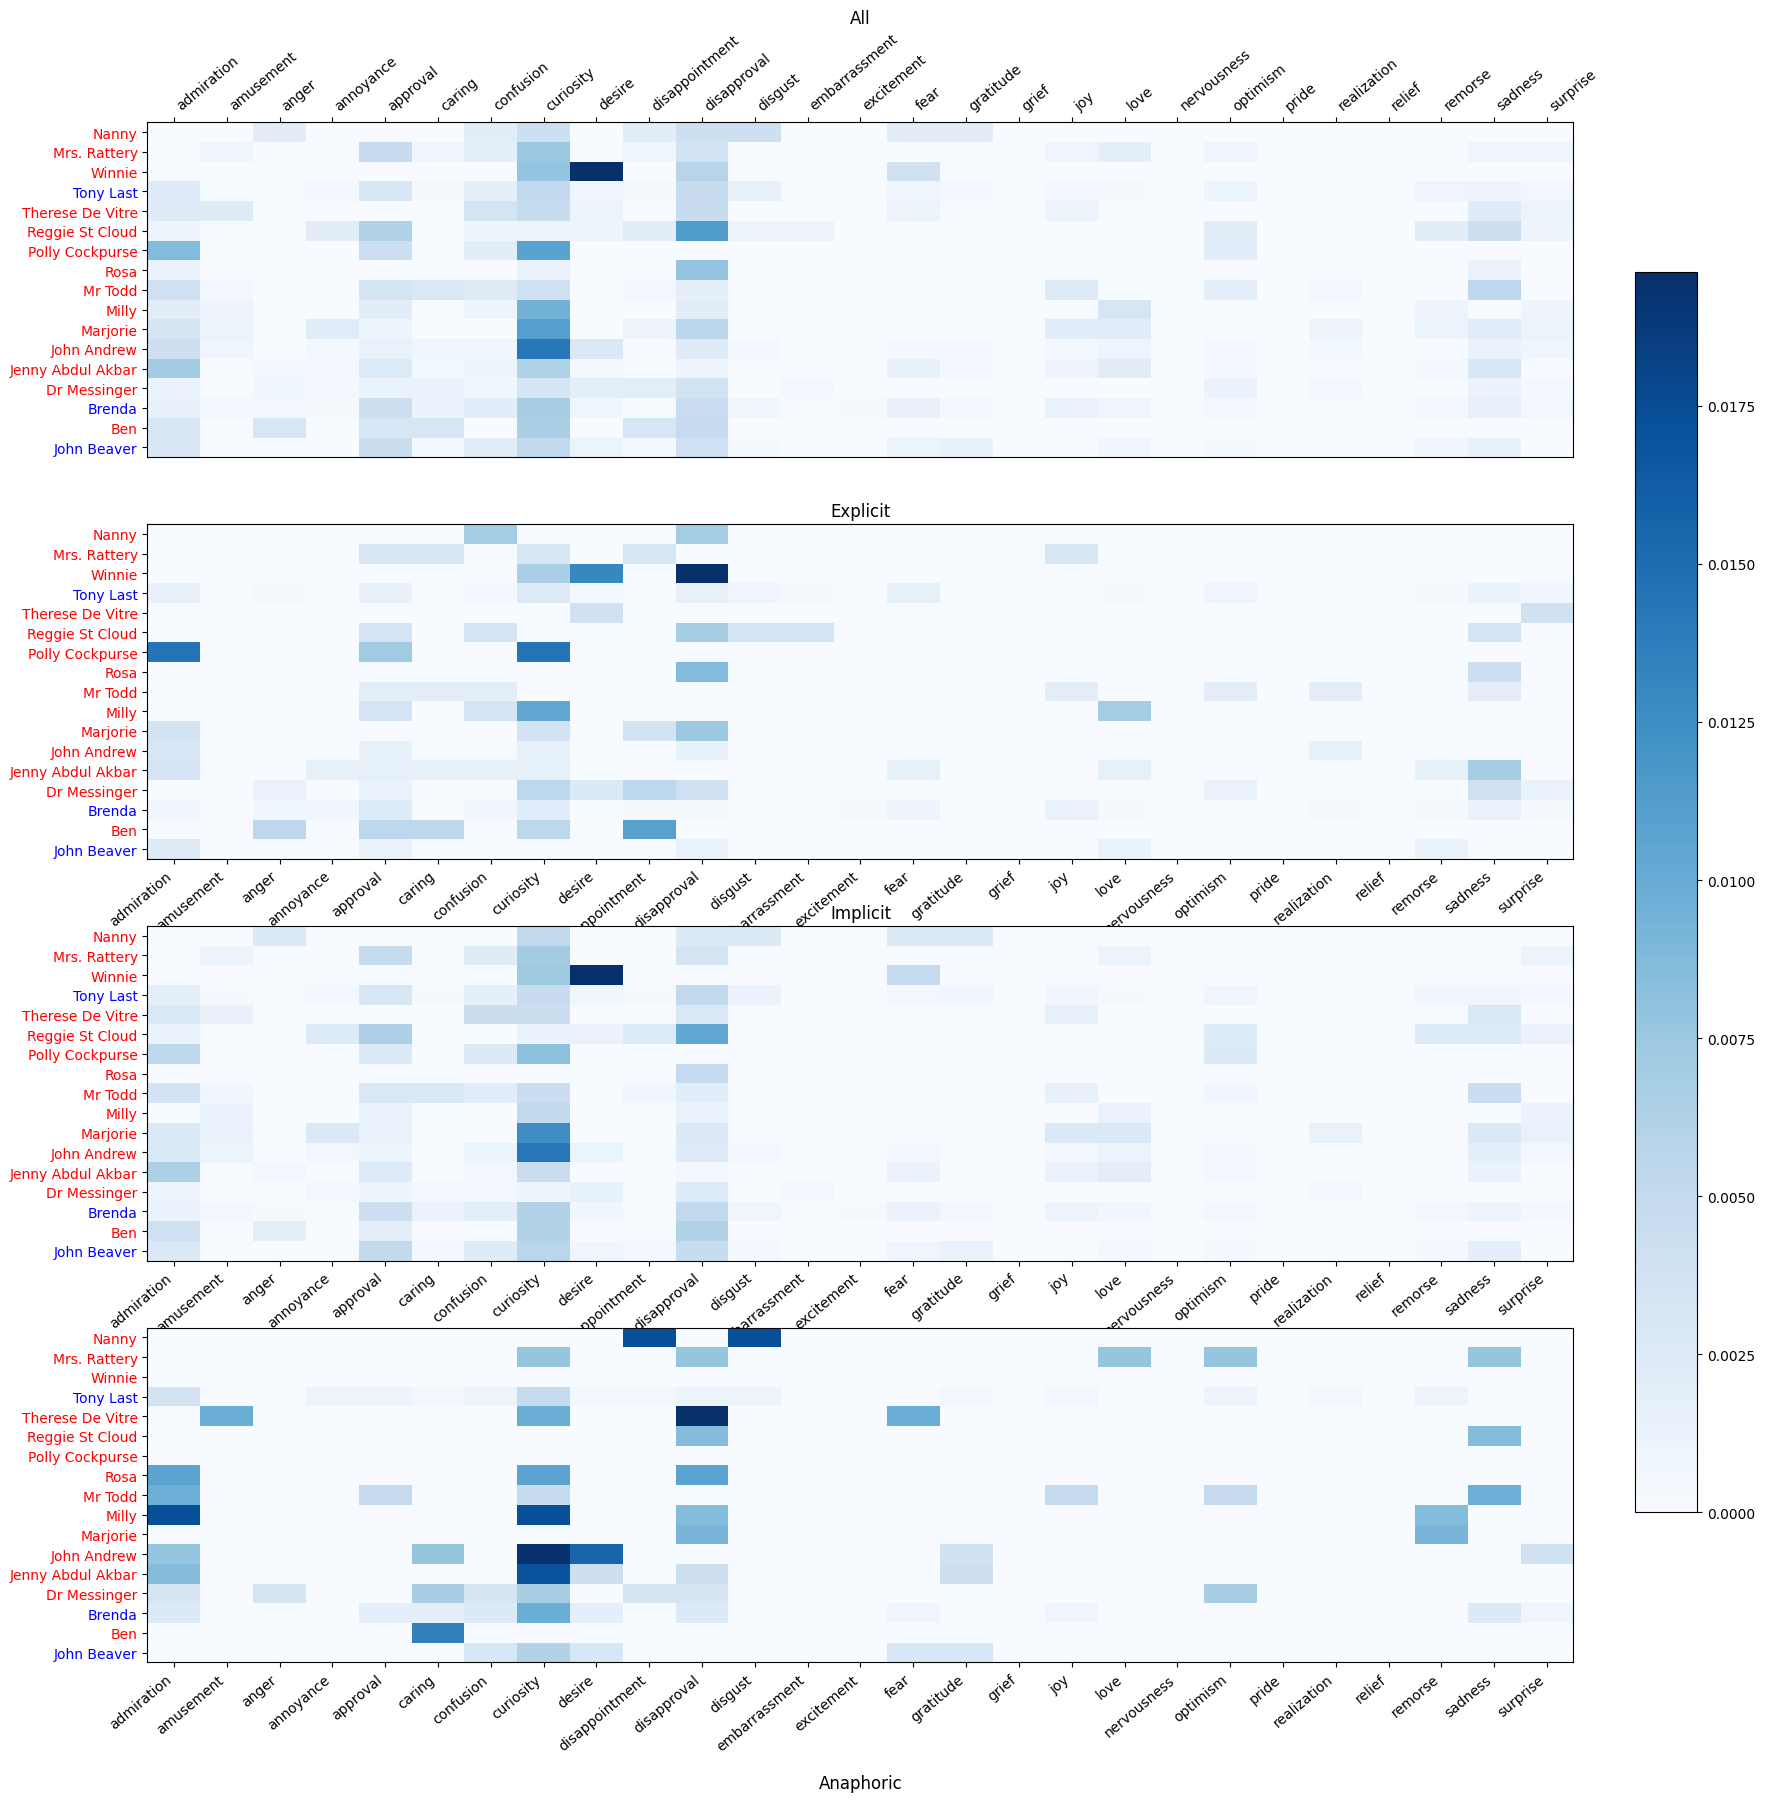

In [206]:
sims,idx  = process2("Explicit")

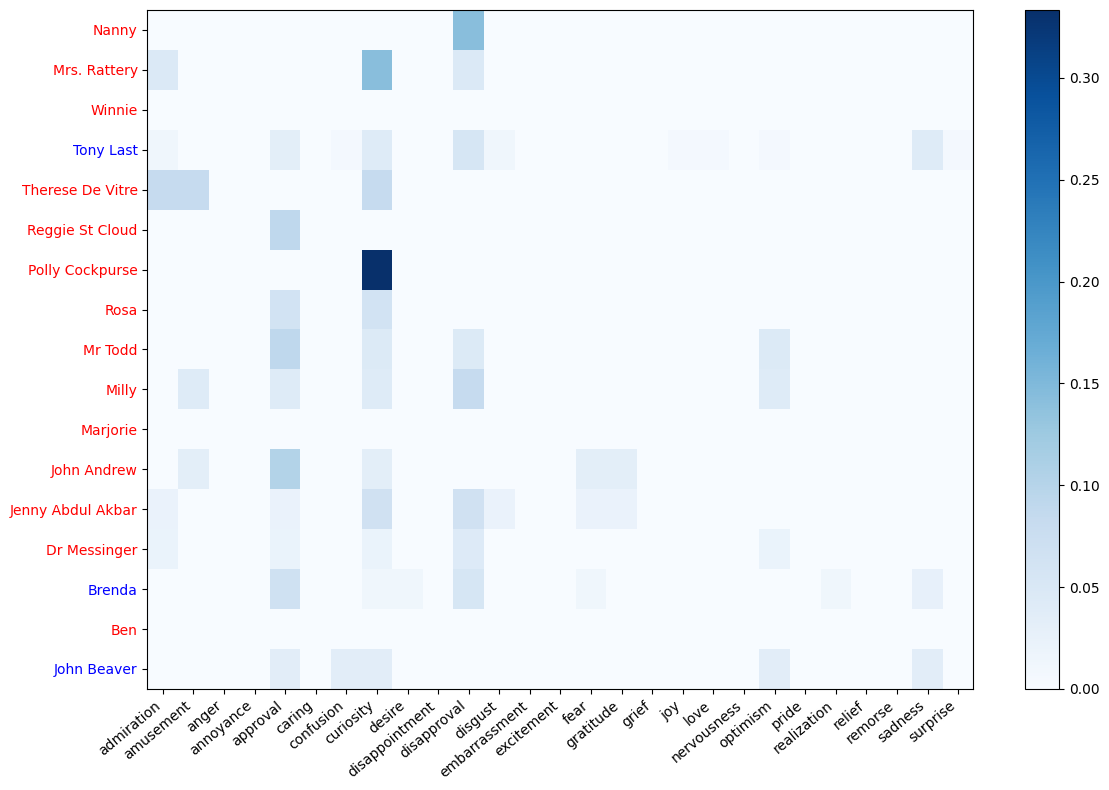

In [29]:
process2("Anaphoric")

In [7]:
ctable = corpus.novels[0].char_table
qtable = corpus.novels[0].quote_table 
quotes = corpus["quotes"][0]
cid = ctable[ctable["Main Name"]=="Winnie"]["Character ID"].iloc[0]

all_quotes = np.where(np.asarray(corpus["speaker_id"][0]) == 38)[0]

explicit_quotes = qtable[(qtable["Character ID"] == cid) & (qtable["quoteType"]=="Explicit")].index.values
implicit_quotes = qtable[(qtable["Character ID"] == cid) & (qtable["quoteType"]=="Implicit")].index.values
anaphoric_quotes = qtable[(qtable["Character ID"] == cid) & (qtable["quoteType"]=="Anaphoric")].index.values

In [11]:
ex_labels = [labels[i] for i in explicit_quotes]
im_labels = [labels[i] for i in implicit_quotes]
an_labels = [labels[i] for i in anaphoric_quotes]


In [12]:
for lab, quote_id in zip(ex_labels, explicit_quotes) : 
    print(lab, quotes[quote_id])

['disapproval', 'neutral'] No,
['desire'] I want to go to the seaside. I won't go with that
man. I don't want a doll. I want to go to the seaside with my mummy.
['curiosity'] Where's the sea?
['neutral'] Oh, come on,
['neutral'] Why don't you bathe?
['neutral'] You've had breakfast,
[] You are greedy,
['neutral'] eating two breakfasts.
['neutral'] But I _want_ to bathe,
['neutral'] You said I could bathe if you had
two breakfasts.


In [13]:
for lab, quote_id in zip(im_labels, implicit_quotes) : 
    print(lab, quotes[quote_id])

['curiosity'] Can I have an ice?
['neutral'] But I want an ice.
['desire'] I want to go and see it.
['desire'] I want to see it to-night.
['desire'] I want late dinner. I want late dinner.
['neutral'] No, I'm dressed. Let's go out.
['desire'] I want to go on the pier.
['desire'] Well, I want to go down to the sea. Come on.
['neutral'] I'll wait here. Mother snores so.
['desire'] But _they're_ bathing. I want to.
[] I believe you're afraid. Can you swim?
['neutral'] Well, why don't you? Bet you can't.
['neutral'] Then why did you say you could. Fibber.
['fear'] It feels horrible. Let's go and have breakfast.
['desire'] She woke
up once and then turned over. Do get her to come out. I want to go on
the pier.
['neutral'] But it's early.
['curiosity', 'neutral'] Can I bathe?
['neutral'] Can I bathe now?


In [15]:
for lab, quote_id in zip(an_labels, anaphoric_quotes) : 
    print(lab, quotes[quote_id])

['neutral'] Mother's still asleep,
['neutral'] It's hardly raining at all,
['neutral'] Now my knickers are wet,


In [13]:
import pickle 
with open("quote_embeddings/novel_1.labels", "wb") as f :
    pickle.dump(labels,f)

In [10]:
import pickle 
with open("quote_embeddings/novel_1.labels", "rb") as f :
    labels =pickle.load(f)

## Stylometric embeddings

### Across novels

In [114]:
from sentence_transformers import SentenceTransformer
from sentence_transformers import util 

model = SentenceTransformer('AnnaWegmann/Style-Embedding')

In [115]:
import torch.nn.functional as F 

In [116]:
all_embeddings = []
all_quote_indices = []
all_names = []

for novel_id in tqdm.tqdm(range(corpus.size)) : 
    
    novel_1 = corpus["quotes"][novel_id]
    speaker_id = corpus["speaker_id"][novel_id]
    qtypes = corpus.novels[novel_id].quote_table["quoteType"].values

    all_quotes = []
    all_sid = []
    all_types = []
    for (quote, sid, qtype)  in zip(novel_1, speaker_id, qtypes) : 
        tokens = word_tokenize(quote) 
        if len(tokens) >= 5 : 
            all_quotes.append(quote)
            all_sid.append(sid)
            all_types.append(qtype)
            
    all_quotes = np.asarray(all_quotes) 
    all_sid = np.asarray(all_sid) 
    all_types = np.asarray(all_types) 
    model.eval()
    with torch.no_grad() : 
        embeddings = model.encode(all_quotes, device=torch.device("cuda:0"))
    normed_embeddings = F.normalize(torch.FloatTensor(embeddings)).numpy()
    all_embeddings.append(normed_embeddings)
    
    names = []
    is_major = []
    quote_indices = defaultdict(list)

    ids = np.unique(all_sid)
    major_ids, int_ids = [], []
    
    for speaker_id in ids : 
        if corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] == "major" : 
            major_ids.append(speaker_id) 
        elif corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] == "intermediate" :
            int_ids.append(speaker_id) 
    ids = major_ids + int_ids
    
    for speaker_id in  ids : 
        if  "unknowable" not in corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Main Name"].iloc[0].lower() \
        and "narr" not in corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Main Name"].iloc[0].lower() : 
            if corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] != "minor" : 
                    
                quote_idx = np.where(all_sid == speaker_id)[0] 
                
                if corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Category"].iloc[0] == "major" : 
                    is_major.append(1)
                else : 
                    is_major.append(0) 
                    
                names.append(corpus.novels[novel_id].char_table[corpus.novels[novel_id].char_table["Character ID"] == speaker_id]["Main Name"].iloc[0])

                #all_indices.append(quote_idx)
                
                quote_indices["all"].append(quote_idx)
                for subset in ["Explicit", "Implicit", "Anaphoric"] :
                    subset_idx = np.where(qtypes[quote_idx] == subset)[0]
                    
                    if len(subset_idx)> 1 :     
                        quote_indices[subset].append(quote_idx[subset_idx])
        
    all_quote_indices.append(quote_indices)

    sims = np.zeros(shape=(4, len(quote_indices["all"]), len(quote_indices["all"])))
    
    for cqt, (qtype, indices) in enumerate(quote_indices.items()) :
        curr_no_neutral = []
        labelled_ids = []
        for c1, idx in enumerate(indices) : 
            curr = []
            for c2, idx_out in enumerate(indices) :            
                #cos = util.dot_score(embeddings[idx], embeddings[idx_out])
                
                if c1 == c2 :  
                    # indices_ = torch.triu(cos , diagonal=1).nonzero()
                    # x = []
                    # for idd in indices_ :
                    #     x.append(cos[idd[0], idd[1]].item())
                    # x = np.mean(x)
                    length = len(idx) 
                    div2 = int(round(length / 2))
                    current = normed_embeddings[idx]
                    x = 0  
                    if length > 1 : 
                        for exp_id in range(5) : 
                            random_idx = np.arange(length)
                            np.random.shuffle(random_idx)
                            
                            emb1 = current[random_idx[:div2]].mean(axis=0)
                            emb2 = current[random_idx[div2:]].mean(axis=0)
                            x += util.dot_score(emb1, emb2)
                        x /= 5
                    else : 
                        print("bug")
                else : 
                    emb1 = normed_embeddings[idx].mean(axis=0)
                    emb2 = normed_embeddings[idx_out].mean(axis=0)
                    x = util.dot_score(emb1, emb2)
                    #x = cos.mean().item()
                sims[cqt, c1, c2] = x


    fig, ax = plt.subplots(figsize = (12,20), nrows=4)
    for cnt, (matrix, name) in enumerate(zip(sims, ["All", "Explicit", "Implicit", "Anaphoric"])) : 
        c = ax[cnt].pcolormesh(matrix, cmap = "Blues")
        #plt.axis(names)
        #plt.imshow(dist_out)
        ax[cnt].set_xticks([i+0.5 for i in range(len(names))])
        ax[cnt].set_xticklabels(names,rotation=40,ha="right")
        ax[cnt].set_yticks([i+0.5 for i in range(len(names))])
        ax[cnt].set_yticklabels(names,ha="right")
        ax[cnt].set_title(name)
        color_mapper = {0 : "red", 1:"blue"}
        [t.set_color(i) for (i,t) in
        zip([color_mapper[i] for i in is_major], ax[cnt].yaxis.get_ticklabels())]
        [t.set_color(i) for (i,t) in
        zip([color_mapper[i] for i in is_major], ax[cnt].xaxis.get_ticklabels())]
        
    ax[0].xaxis.tick_top()
    ax[0].set_xticklabels(names,rotation=40,ha="left")
    [t.set_color(i) for (i,t) in
    zip([color_mapper[i] for i in is_major], ax[0].xaxis.get_ticklabels())]

    ax[-1].set_title(name,  y=-0.4)
    [t.set_color(i) for (i,t) in
    zip([color_mapper[i] for i in is_major], ax[-1].xaxis.get_ticklabels())]

    fig.colorbar(c, ax=ax.ravel().tolist(), fraction=0.04, pad = 0.04)
    
    plt.savefig(f"/workspace/quote_embeddings/figures/stylo_cos_sim/{corpus.get_novel_name(novel_id)}.png",dpi=100)
    plt.close()


    # Scatter 
    
    # tsne = TSNE()
    # x = tsne.fit_transform(embeddings)
    
    # fig, ax = plt.subplots(figsize=(16,20), ncols =2, nrows = 4 )


    # for cnt, (name, indices) in enumerate(quote_indices.items()) : 
    #     cm = plt.get_cmap('viridis')

    #     NUM_COLORS = len([ i for i in is_major if i == 1])
    #     cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
    #     scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
    #     ax[cnt,0].set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

    #     for cnt2, idx in enumerate(indices) : 
    #         if is_major[cnt2] == 1 : 
    #             ax[cnt,0].scatter(x[idx, 0], x[idx,1], label = names[cnt2])
                
    #     ax[cnt,0].legend(frameon=False, bbox_to_anchor = (1,1,0,0))


    #     cm = plt.get_cmap('viridis')
    #     NUM_COLORS = len([ i for i in is_major if i == 0])
    #     cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
    #     scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
    #     ax[cnt,1].set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(NUM_COLORS)])
    #     for cnt2, idx in enumerate(indices) : 
    #         if is_major[cnt2] == 0 : 
    #             ax[cnt,1].scatter(x[idx, 0], x[idx,1], label = names[cnt2])
                
    #     ax[cnt,1].legend(frameon=False, bbox_to_anchor = (1,1,0,0))
        
    # plt.tight_layout()
    # plt.savefig(f"/workspace/quote_embeddings/figures/stylo_scatter/{corpus.get_novel_name(novel_id)}.png",dpi=100)
    # plt.close()

  0%|          | 0/28 [00:00<?, ?it/s]

100%|██████████| 28/28 [01:18<00:00,  2.81s/it]


### Inter novels

In [49]:
cat_embeddings = np.concatenate(all_embeddings)

In [50]:
full_qidx = defaultdict(list)
cnt = 0
breakpoints = [0]
for novel_cnt, novel_qidx in enumerate(all_quote_indices) :
    for key, indices in novel_qidx.items(): 
        full_qidx[key].extend([i + cnt for i in indices])
    breakpoints.append(len(indices) + breakpoints[-1])
    cnt += len(all_embeddings[novel_cnt])
breakpoints = breakpoints[1:-1]

In [ ]:
sims = np.zeros(shape=(4, len(full_qidx["all"]) + 27, len(full_qidx["all"]) + 27))

for cqt, (qtype, indices) in enumerate(full_qidx.items()) :
    offset_x = 0 

    curr_no_neutral = []
    labelled_ids = []
    for c1, idx in enumerate(indices) : 
        curr = []
        offset_y = 0 

        if c1 in breakpoints : 
            offset_x +=1 
        for c2, idx_out in enumerate(indices) : 
            if c2 in breakpoints: 
                offset_y += 1 
            #cos = util.dot_score(embeddings[idx], embeddings[idx_out])

            if c1 == c2 :  
                # indices_ = torch.triu(cos , diagonal=1).nonzero()
                # x = []
                # for idd in indices_ :
                #     x.append(cos[idd[0], idd[1]].item())
                # x = np.mean(x)
                length = len(idx) 
                div2 = int(round(length / 2))
                current = cat_embeddings[idx]
                x = 0  
                if length > 1 : 
                    for exp_id in range(5) : 
                        random_idx = np.arange(length)
                        np.random.shuffle(random_idx)

                        emb1 = current[random_idx[:div2]].mean(axis=0)
                        emb2 = current[random_idx[div2:]].mean(axis=0)
                        x += util.dot_score(emb1, emb2)
                    x /= 5
                else : 
                    print("bug")
            else : 
                emb1 = cat_embeddings[idx].mean(axis=0)
                emb2 = cat_embeddings[idx_out].mean(axis=0)
                x = util.dot_score(emb1, emb2)
                #x = cos.mean().item()
            sims[cqt, c1 + offset_x, c2 + offset_y] = x


for cnt, (matrix, name) in enumerate(zip(sims, ["All", "Explicit", "Implicit", "Anaphoric"])) : 
    
    fig, ax = plt.subplots(figsize = (13,12), nrows=1)
    c = ax.pcolormesh(matrix, cmap = "Blues")
    #plt.axis(names)
    #plt.imshow(dist_out)
    ax.set_xticks([])
    #ax[cnt].set_xticklabels(names,rotation=40,ha="right")
    ax.set_yticks([])
    #ax[cnt].set_yticklabels(names,ha="right")
    ax.set_title(name)
    #[t.set_color(i) for (i,t) in
    #zip([color_mapper[i] for i in is_major], ax[cnt].yaxis.get_ticklabels())]
    #[t.set_color(i) for (i,t) in
    #zip([color_mapper[i] for i in is_major], ax[cnt].xaxis.get_ticklabels())]

#ax[0].set_xticklabels(names,rotation=40,ha="left")
#[t.set_color(i) for (i,t) in
#zip([color_mapper[i] for i in is_major], ax[0].xaxis.get_ticklabels())]
#[t.set_color(i) for (i,t) in
#zip([color_mapper[i] for i in is_major], ax[-1].xaxis.get_ticklabels())]

    fig.colorbar(c, ax=ax.ravel().tolist(), fraction=0.04, pad = 0.04)
    plt.savefig(f"quote_embeddings/figures/stylo_cos_sim/AllNovels_{name}.png", dpi = 300)

In [ ]:
1+1

## Merged Quote Stylometric Embeddings